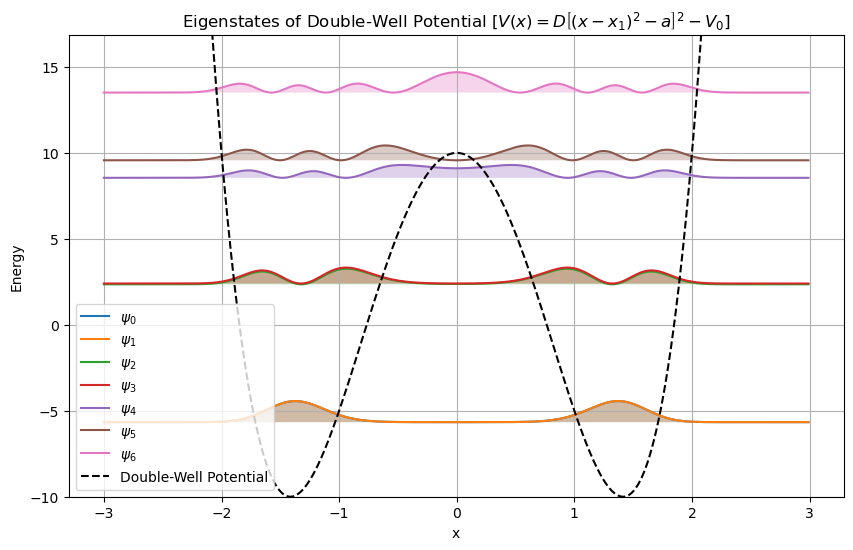

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def solve_double_well_potential(x_min, x_max, dx, D=1, x1=-2, a=1, V_0=0, m=1):
    '''Function to compute the matrix elements, eigenvalues, 
    and eigenvectors of the Hamiltonian for the double-well potential 
    within a box defined by (x_min, x_max, dx).
    D is the depth of the wells, x1 is the position of the first well, 
    a is the width and separation of the wells, V_0 is the barrier height, 
    and m is the mass of the particle.'''

    h_bar = 1  # Planck's reduced constant (set to 1 for simplicity)

    def potential(x):
        '''Computes the double-well potential energy for a given position array x.'''
        return D * ((x - x1)**2 - a)**2 - V_0

    def kinetic_energy(x):
        '''Computes the kinetic energy matrix using the finite difference method.'''
        dx = x[1] - x[0]
        n = len(x)
        laplacian = np.diag(-2.0 * np.ones(n)) + np.diag(np.ones(n - 1), k=1) + np.diag(np.ones(n - 1), k=-1)
        laplacian /= dx**2
        return -(h_bar**2) / (2 * m) * laplacian

    def hamiltonian_matrix(x_values):
        '''Computes the Hamiltonian matrix.'''
        n = len(x_values)
        H_kinetic = kinetic_energy(x_values)
        H_potential = np.diag(potential(x_values))
        return H_kinetic + H_potential

    def compute_eigenstates(x_values):
        '''Computes the matrix elements, eigenstates, and eigenvalues of the Hamiltonian.'''
        H_matrix = hamiltonian_matrix(x_values)
        eigenvalues, eigenvectors = np.linalg.eigh(H_matrix)
        return H_matrix, eigenvalues, eigenvectors

    # Define the spatial grid starting from x_min
    x_values = np.arange(x_min, x_max, dx)
    # Store the matrix elements, eigenvalues, and eigenvectors of the Hamiltonian
    H_double_well, eig_val_double_well, eig_vec_double_well = compute_eigenstates(x_values)

    return H_double_well, eig_val_double_well, eig_vec_double_well, x_values

# Example usage:
x_min, x_max, dx = -3, 3, 0.01
D, x1, a, V_0 = 5, 0, 2, 10  # Adjust 'a' to change the width of the wells
m = 1
H_double_well, eig_val_double_well, eig_vec_double_well, x_values = solve_double_well_potential(x_min, x_max, dx, D, x1, a, V_0, m)

# Plot the results
plt.figure(figsize=(10, 6))
scale_for_plot = 150
for i in range(min(7, len(eig_val_double_well))):
    plt.plot(x_values, eig_val_double_well[i] * np.ones(len(x_values)) + scale_for_plot * np.abs(eig_vec_double_well[:, i])**2, label=f'$\psi_{i}$')
    plt.fill_between(x_values, eig_val_double_well[i] * np.ones(len(x_values)) + scale_for_plot * np.abs(eig_vec_double_well[:, i])**2,
                     eig_val_double_well[i] * np.ones(len(x_values)), alpha=0.3)

plt.plot(x_values, D * ((x_values - x1)**2 - a)**2 - V_0, 'k--', label='Double-Well Potential')
plt.ylim([0, eig_val_double_well[min(6, len(eig_val_double_well)-1)]])
plt.xlabel('x')
plt.ylabel('Energy')
plt.title('Eigenstates of Double-Well Potential ['r'$V(x) = D \left[(x - x_1)^2 - a\right]^2 - V_0$]')
plt.legend()
plt.ylim([-1*V_0, eig_val_double_well[7]])
plt.grid(True)
plt.show()


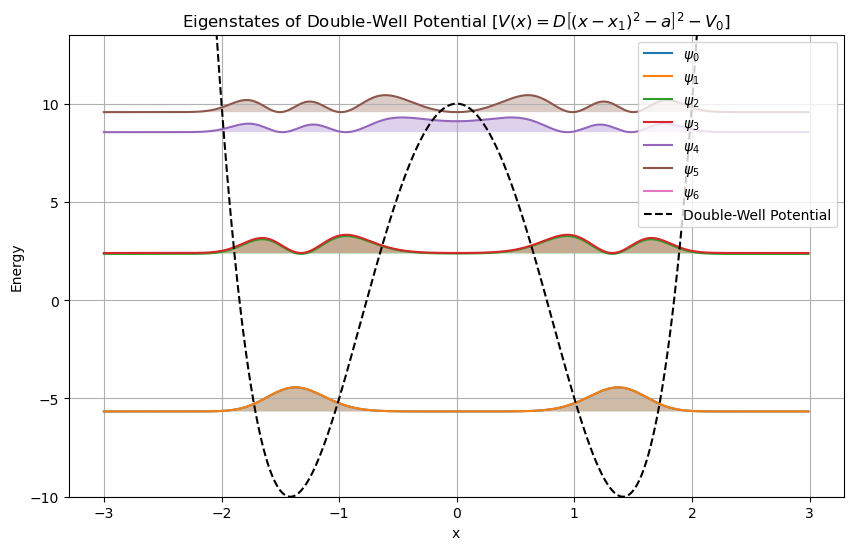

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def solve_double_well_potential(x_min, x_max, dx, D=1, x1=-2, a=1, V_0=0, m=1):
    '''Function to compute the matrix elements, eigenvalues, 
    and eigenvectors of the Hamiltonian for the double-well potential 
    within a box defined by (x_min, x_max, dx).
    D is the depth of the wells, x1 is the position of the first well, 
    a is the width and separation of the wells, V_0 is the barrier height, 
    and m is the mass of the particle.'''
    
    h_bar = 1  # Planck's reduced constant (set to 1 for simplicity)
    
    def potential(x):
        '''Computes the double-well potential energy for a given position array x.'''
        return D * ((x - x1)**2 - a)**2 - V_0
    
    def kinetic_energy(x):
        '''Computes the kinetic energy matrix using the finite difference method.'''
        dx = x[1] - x[0]
        n = len(x)
        laplacian = np.diag(-2.0 * np.ones(n)) + np.diag(np.ones(n - 1), k=1) + np.diag(np.ones(n - 1), k=-1)
        laplacian /= dx**2
        return -(h_bar**2) / (2 * m) * laplacian
    
    def hamiltonian_matrix(x_values):
        '''Computes the Hamiltonian matrix.'''
        n = len(x_values)
        H_kinetic = kinetic_energy(x_values)
        H_potential = np.diag(potential(x_values))
        return H_kinetic + H_potential
    
    def compute_eigenstates(x_values):
        '''Computes the matrix elements, eigenstates, and eigenvalues of the Hamiltonian.'''
        H_matrix = hamiltonian_matrix(x_values)
        eigenvalues, eigenvectors = np.linalg.eigh(H_matrix)
        return H_matrix, eigenvalues, eigenvectors
    
    # Define the spatial grid starting from x_min
    x_values = np.arange(x_min, x_max, dx)
    # Store the matrix elements, eigenvalues, and eigenvectors of the Hamiltonian
    H_double_well, eig_val_double_well, eig_vec_double_well = compute_eigenstates(x_values)
    
    return H_double_well, eig_val_double_well, eig_vec_double_well, x_values

# Example usage:
x_min, x_max, dx = -3, 3, 0.01
D, x1, a, V_0 = 5, 0, 2, 10  # Adjust 'a' to change the width of the wells
m = 1
H_double_well, eig_val_double_well, eig_vec_double_well, x_values = solve_double_well_potential(x_min, x_max, dx, D, x1, a, V_0, m)

# Plot the results
plt.figure(figsize=(10, 6))
scale_for_plot = 150
for i in range(min(7, len(eig_val_double_well))):
    plt.plot(x_values, eig_val_double_well[i] * np.ones(len(x_values)) + scale_for_plot * np.abs(eig_vec_double_well[:, i])**2, label=f'$\psi_{i}$')
    plt.fill_between(x_values, eig_val_double_well[i] * np.ones(len(x_values)) + scale_for_plot * np.abs(eig_vec_double_well[:, i])**2,
                     eig_val_double_well[i] * np.ones(len(x_values)), alpha=0.3)

plt.plot(x_values, D * ((x_values - x1)**2 - a)**2 - V_0, 'k--', label='Double-Well Potential')
plt.ylim([-1 * V_0, eig_val_double_well[min(6, len(eig_val_double_well)-1)]])
plt.xlabel('x')
plt.ylabel('Energy')
plt.title('Eigenstates of Double-Well Potential ['r'$V(x) = D \left[(x - x_1)^2 - a\right]^2 - V_0$]')
plt.legend()
plt.grid(True)
plt.show()
